<a href="https://colab.research.google.com/github/kang9366/PetKeeper_DeepLearning/blob/main/Training/Eye_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch import optim

# dataset and transformation
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
import pandas as pd

# display images
from torchvision import utils
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline

# utils
import numpy as np
from torchsummary import summary
import time
import copy
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/data'

In [ ]:
normal = os.listdir(path + '/정상')
conjunctivitis = os.listdir(path + '/결막염')
cataract = os.listdir(path + '/백내장 성숙')
blepharitis = os.listdir(path + '/안검염')
keratitis = os.listdir(path + '/색소침착성각막염')
entropion = os.listdir(path + '/안검내반증')
sclerosis = os.listdir(path + '/핵경화')
mastopathy = os.listdir(path + '/유루증')
nonUlcerative = os.listdir(path + '/비궤양성각막질환 상')
ulcerative = os.listdir(path + '/궤양성각막염 상')

data = {'class':[],'num':[]}
data['class'] += ['normal', 'conjunctivitis', 'cataract', 'blepharitis', 'keratitis', 'entropion', 'sclerosis', 'mastopathy', 'non-ulcerative', 'ulcerative']
data['num'] += [len(normal), len(conjunctivitis), len(cataract),
                len(blepharitis), len(keratitis), len(entropion),
                len(sclerosis), len(mastopathy), len(nonUlcerative), len(ulcerative)]

df = pd.DataFrame(data)
df

<Axes: xlabel='class', ylabel='num'>

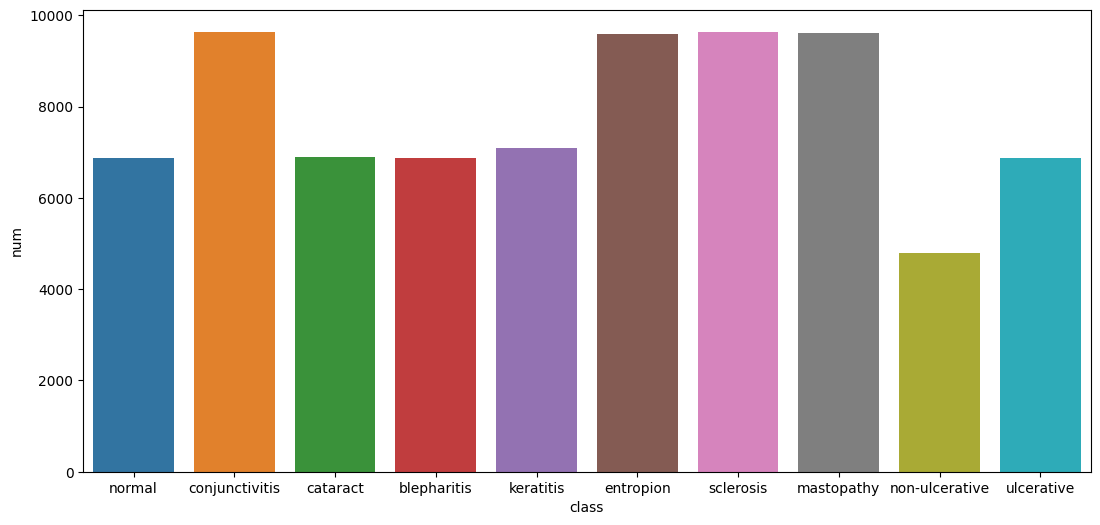

In [7]:
plt.figure(figsize=(13,6))
sns.barplot(x=df['class'],y=df['num'])

/content/drive/MyDrive/data/색소침착성각막염/crop_D21_164ce4a7-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D11_3d507daf-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/백내장 성숙/crop_D51_03043d31-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D40_0e5e3aaa-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/비궤양성각막질환 상/crop_D40_18c0cfc4-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/결막염/crop_D32_3178def1-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/궤양성각막염 상/crop_D27_3aad2f0f-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/핵경화/crop_D12_3dabada6-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/비궤양성각막질환 상/crop_D45_18a8c2a8-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/백내장 성숙/crop_D43_2f5f873d-60a5-11ec-8402-0a7404972c70.jpg


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4370 (\N{HANGUL CHOSEONG HIEUH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4458 (\N{HANGUL JUNGSEONG WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


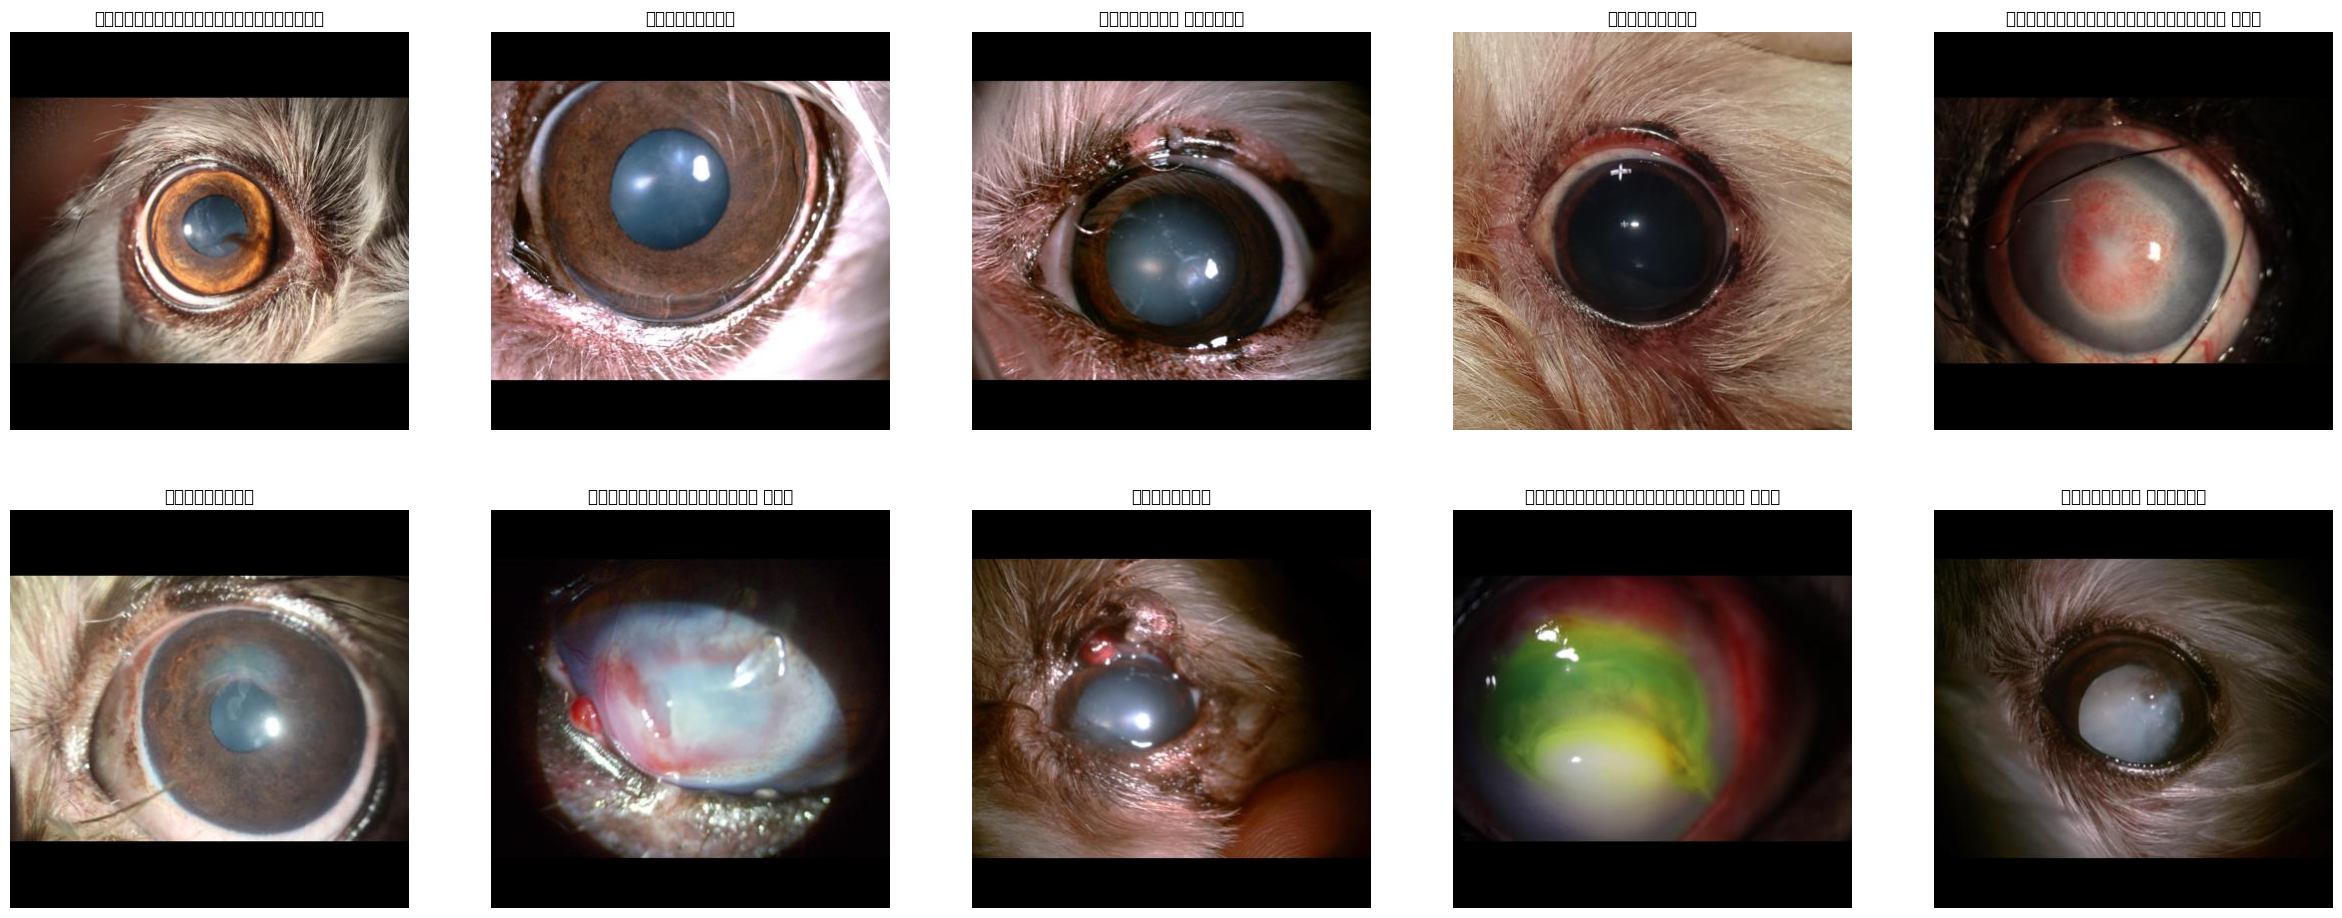

In [9]:
classes = os.listdir(path)

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,10)                    # getting the class
    images = os.listdir(path+'/'+classes[i])
    j = random.randint(0,1000)                  # getting the image
    image = cv2.imread(path+'/'+classes[i]+'/'+images[j])
    print(path+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

## 데이터 증강

In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    


file_list = [path + '/정상', path + '/결막염', path + '/백내장 성숙', path + '/안검염', path + '/색소침착성각막염', path + '/안검내반증', path + '/핵경화', path + '/유루증', path + '/비궤양성각막질환 상', path + '/궤양성각막염 상']

for j in file_list:
  num_augmented_images = 10000-len(j)
  augment_cnt = 1
  file_names = os.listdir(j)
  for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, len(j)-1)
    print(change_picture_index)
    print(file_names[change_picture_index])
    file_name = file_names[change_picture_index]
    
    origin_image_path = j + '/' + file_name
    print(origin_image_path)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,4)
    
    if(random_augment == 1):
        #이미지 좌우 반전
        print("invert")
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save(j + '/inverted_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 2):
        #이미지 기울이기
        print("rotate")
        rotated_image = image.rotate(random.randrange(-20, 20))
        rotated_image.save(j + '/rotated_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 3):
        #노이즈 추가하기
        img = cv2.imread(origin_image_path)
        print("noise")
        row,col,ch= img.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy_array = img + gauss
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        noisy_image.save(j + '/noiseAdded_' + str(augment_cnt) + '.png')
        
    augment_cnt += 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
noise
29
crop_D14_1c401dca-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D14_1c401dca-60a5-11ec-8402-0a7404972c70.jpg
noise
26
crop_D46_13903b50-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D46_13903b50-60a5-11ec-8402-0a7404972c70.jpg
rotate
16
crop_D45_0dbbdb8d-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D45_0dbbdb8d-60a5-11ec-8402-0a7404972c70.jpg
invert
16
crop_D45_0dbbdb8d-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D45_0dbbdb8d-60a5-11ec-8402-0a7404972c70.jpg
invert
4
crop_D59_3de6d1d9-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D59_3de6d1d9-60a5-11ec-8402-0a7404972c70.jpg
rotate
16
crop_D45_0dbbdb8d-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D45_0dbbdb8d-60a5-11ec-8402-0a7404972c70.jpg
rotate
3
crop_D5_1ce7c920-60a5-11ec-8402-0a7404972c70.jpg
/content/drive/MyDrive/data/안검염/crop_D5_1ce7c920-60a5-11e

# 데이터 불러오기

In [26]:
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

dataset = ImageFolder('/content/drive/MyDrive/data',
                      transform=transforms.Compose([transforms.RandomCrop(96), transforms.ToTensor()]))

train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train, validation = random_split(dataset, [train_size, test_size])

In [16]:
print(len(train))
print(len(validation))

75726
32454


In [17]:
train_dl = DataLoader(train, batch_size=32, shuffle=True)
val_dl = DataLoader(validation, batch_size=32, shuffle=True)

In [27]:
print(dataset.classes)

['결막염', '궤양성각막염 상', '궤양성각막염 하', '백내장 비성숙', '백내장 성숙', '백내장 초기', '비궤양성각막질환 상', '비궤양성각막질환 하', '색소침착성각막염', '안검내반증', '안검염', '안검종양', '유루증', '정상', '핵경화']


# MobileNet

In [ ]:
# Depthwise Separable Convolution
class Depthwise(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.depthwise = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, 3, stride=stride, padding=1, groups=in_channels, bias=False),
            nn.BatchNorm2d(in_channels),
            nn.ReLU6(),
        )

        self.pointwise = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 1, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU6()
        )
    
    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        return x

In [ ]:
# Basic Conv2d
class BasicConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, **kwargs):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, **kwargs),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.conv(x)
        return x

In [ ]:
# MobileNetV1
class MobileNet(nn.Module):
    def __init__(self, width_multiplier, num_classes=2, init_weights=True):
        super().__init__()
        self.init_weights=init_weights
        alpha = width_multiplier

        self.conv1 = BasicConv2d(3, int(32*alpha), 3, stride=2, padding=1)
        self.conv2 = Depthwise(int(32*alpha), int(64*alpha), stride=1)
        # down sample
        self.conv3 = nn.Sequential(
            Depthwise(int(64*alpha), int(128*alpha), stride=2),
            Depthwise(int(128*alpha), int(128*alpha), stride=1)
        )
        # down sample
        self.conv4 = nn.Sequential(
            Depthwise(int(128*alpha), int(256*alpha), stride=2),
            Depthwise(int(256*alpha), int(256*alpha), stride=1)
        )
        # down sample
        self.conv5 = nn.Sequential(
            Depthwise(int(256*alpha), int(512*alpha), stride=2),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
        )
        # down sample
        self.conv6 = nn.Sequential(
            Depthwise(int(512*alpha), int(1024*alpha), stride=2)
        )
        # down sample
        self.conv7 = nn.Sequential(
            Depthwise(int(1024*alpha), int(1024*alpha), stride=2)
        )

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.linear = nn.Linear(int(1024*alpha), num_classes)

        # weights initialization
        if self.init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv7(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

    # weights initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def mobilenet(alpha=1, num_classes=2):
    return MobileNet(alpha, num_classes)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.randn((3, 3, 224, 224)).to(device)
model = mobilenet(alpha=1).to(device)
output = model(x)
print('output size:', output.size())

output size: torch.Size([3, 2])


In [ ]:
summary(model, (3, 224, 224), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
       BasicConv2d-4         [-1, 32, 112, 112]               0
            Conv2d-5         [-1, 32, 112, 112]             288
       BatchNorm2d-6         [-1, 32, 112, 112]              64
             ReLU6-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]           2,048
       BatchNorm2d-9         [-1, 64, 112, 112]             128
            ReLU6-10         [-1, 64, 112, 112]               0
        Depthwise-11         [-1, 64, 112, 112]               0
           Conv2d-12           [-1, 64, 56, 56]             576
      BatchNorm2d-13           [-1, 64, 56, 56]             128
            ReLU6-14           [-1, 64,

In [ ]:
# define loss function, optimizer, lr_scheduler
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=0.01)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=10)


# get current lr
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']


# calculate the metric per mini-batch
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects


# calculate the loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss_b = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss_b.backward()
        opt.step()
    
    return loss_b.item(), metric_b


# calculate the loss per epochs
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b
        
        if metric_b is not None:
            running_metric += metric_b

        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data
    return loss, metric


# function to start training
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params['loss_func']
    opt=params['optimizer']
    train_dl=params['train_dl']
    val_dl=params['val_dl']
    sanity_check=params['sanity_check']
    lr_scheduler=params['lr_scheduler']
    path2weights=params['path2weights']

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    best_loss = float('inf')
    best_model_wts = copy.deepcopy(model.state_dict())
    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr= {}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print('Copied best model weights!')

        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print('Loading best model weights!')
            model.load_state_dict(best_model_wts)

        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [ ]:
# define the training parameters
params_train = {
    'num_epochs':40,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [ ]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/39, current lr= 0.01
Copied best model weights!
train loss: 0.772127, val loss: 0.722448, accuracy: 63.94, time: 0.2230 min
----------
Epoch 1/39, current lr= 0.01
train loss: 0.504957, val loss: 1.054457, accuracy: 65.88, time: 0.4290 min
----------
Epoch 2/39, current lr= 0.01
Copied best model weights!
train loss: 0.452284, val loss: 0.460766, accuracy: 82.39, time: 0.6430 min
----------
Epoch 3/39, current lr= 0.01
Copied best model weights!
train loss: 0.434545, val loss: 0.449064, accuracy: 78.50, time: 0.8669 min
----------
Epoch 4/39, current lr= 0.01
train loss: 0.381259, val loss: 0.912483, accuracy: 63.80, time: 1.1147 min
----------
Epoch 5/39, current lr= 0.01
train loss: 0.407009, val loss: 0.502549, accuracy: 77.39, time: 1.3287 min
----------
Epoch 6/39, current lr= 0.01
train loss: 0.370083, val loss: 0.771078, accuracy: 58.25, time: 1.5412 min
----------
Epoch 7/39, current lr= 0.01
Copied best model weights!
train loss: 0.386745, val loss: 0.315626, accuracy:

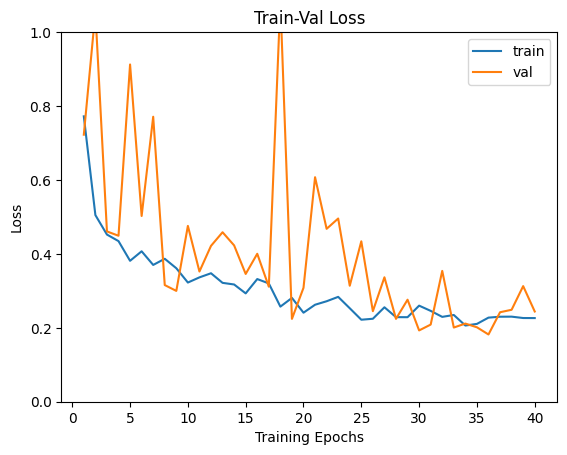

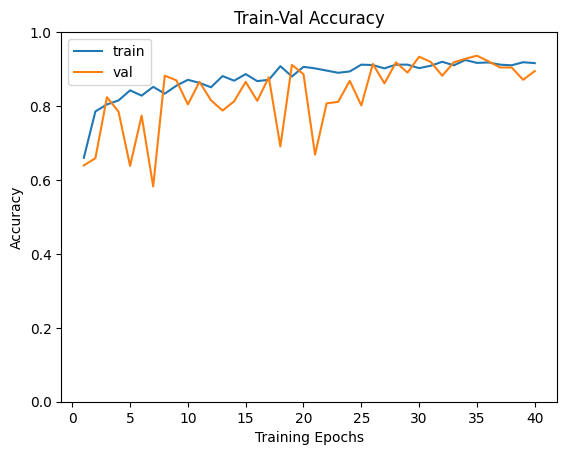

In [ ]:
# train-val progress
num_epochs = params_train['num_epochs']

# plot loss progress
plt.title('Train-Val Loss')
plt.plot(range(1, num_epochs+1), loss_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), loss_hist['val'], label='val')
plt.ylim([0,1])
plt.ylabel('Loss')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

# plot accuracy progress
plt.title('Train-Val Accuracy')
plt.plot(range(1, num_epochs+1), metric_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), metric_hist['val'], label='val')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

In [ ]:
path

'/content/drive/MyDrive/data'

In [ ]:
model = MobileNet(1, 2) # 모델 선언 시의 파라미터 조건이 있던 경우 같이 추가
model.load_state_dict(torch.load(path + '/weights.pt'))
model.eval()

In [ ]:
from PIL import Image

image_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
])

da = os.listdir(path + '/ttest')
da

for i in da:
  image = Image.open(path + '/ttest/' + i)
  image_tensor = image_transforms(image).unsqueeze(0)

  with torch.no_grad():
    output = model(image_tensor)

  _, predicted = torch.max(output.data, 1)
  print('Predicted:', dataset.classes[predicted.item()])

Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis
Predicted: conjunctivitis


In [ ]:
dataset.classes

['conjunctivitis', 'normal']

# ResNet

In [ ]:
# import package

# model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch import optim
from torch.optim.lr_scheduler import StepLR

# dataset and transformation
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline

# utils
import numpy as np
from torchsummary import summary
import time
import copy

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        # BatchNorm에 bias가 포함되어 있으므로, conv2d는 bias=False로 설정합니다.
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BasicBlock.expansion, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * BasicBlock.expansion),
        )

        # identity mapping, input과 output의 feature map size, filter 수가 동일한 경우 사용.
        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        # projection mapping using 1x1conv
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BasicBlock.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x


class BottleNeck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BottleNeck.expansion, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels * BottleNeck.expansion),
        )

        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels*BottleNeck.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels*BottleNeck.expansion)
            )
            
    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, num_block, num_classes=2, init_weights=True):
        super().__init__()

        self.in_channels=64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # weights inittialization
        if init_weights:
            self._initialize_weights()

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self,x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        x = self.conv3_x(output)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

    # define weight initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def resnet18():
    return ResNet(BasicBlock, [2,2,2,2])

def resnet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

def resnet50():
    return ResNet(BottleNeck, [3,4,6,3])

def resnet101():
    return ResNet(BottleNeck, [3, 4, 23, 3])

def resnet152():
    return ResNet(BottleNeck, [3, 8, 36, 3])

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = resnet50().to(device)
x = torch.randn(3, 3, 224, 224).to(device)
output = model(x)
print(output.size())

torch.Size([3, 2])


In [ ]:
summary(model, (3, 224, 224), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=0.001)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=10)

In [ ]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

In [ ]:
# function to calculate metric per mini-batch
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects


# function to calculate loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

In [ ]:
# function to calculate loss and metric per epoch
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b
        
        if metric_b is not None:
            running_metric += metric_b
        
        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data

    return loss, metric

In [ ]:
# function to start training
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    # # GPU out of memoty error
    # best_model_wts = copy.deepcopy(model.state_dict())

    best_loss = float('inf')

    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            # best_model_wts = copy.deepcopy(model.state_dict())

            # torch.save(model.state_dict(), path2weights)
            # print('Copied best model weights!')
            print('Get best val_loss')

        lr_scheduler.step(val_loss)

        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    # model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history

In [ ]:
# definc the training parameters
params_train = {
    'num_epochs':40,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

# create the directory that stores weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [ ]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/39, current lr=0.001
Get best val_loss
train loss: 0.745957, val loss: 0.617264, accuracy: 72.26, time: 0.2717 min
----------
Epoch 1/39, current lr=0.001
train loss: 0.430108, val loss: 0.682849, accuracy: 73.79, time: 0.5513 min
----------
Epoch 2/39, current lr=0.001
Get best val_loss
train loss: 0.396262, val loss: 0.576598, accuracy: 71.01, time: 0.8235 min
----------
Epoch 3/39, current lr=0.001
train loss: 0.424522, val loss: 0.876691, accuracy: 58.39, time: 1.1027 min
----------
Epoch 4/39, current lr=0.001
Get best val_loss
train loss: 0.400004, val loss: 0.467938, accuracy: 77.53, time: 1.3741 min
----------
Epoch 5/39, current lr=0.001
train loss: 0.379099, val loss: 0.508822, accuracy: 78.09, time: 1.6522 min
----------
Epoch 6/39, current lr=0.001
train loss: 0.380911, val loss: 0.599303, accuracy: 79.75, time: 1.9166 min
----------
Epoch 7/39, current lr=0.001
Get best val_loss
train loss: 0.389345, val loss: 0.413076, accuracy: 81.28, time: 2.1957 min
----------


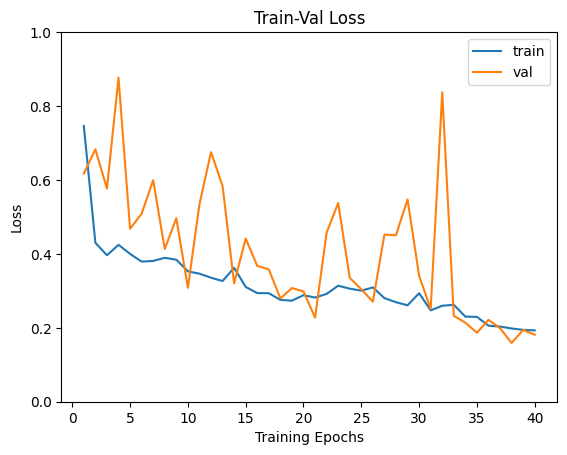

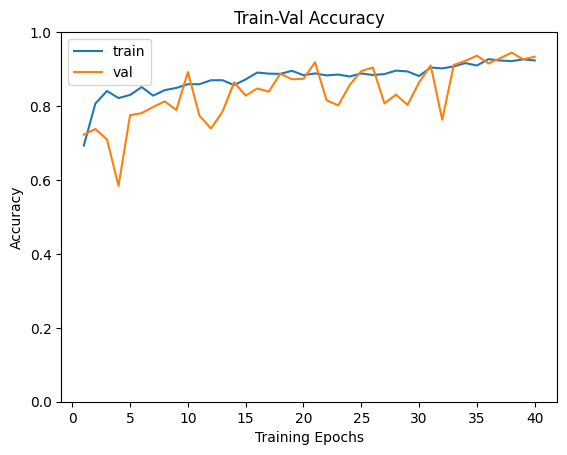

In [ ]:
# train-val progress
num_epochs = params_train['num_epochs']

# plot loss progress
plt.title('Train-Val Loss')
plt.plot(range(1, num_epochs+1), loss_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), loss_hist['val'], label='val')
plt.ylim([0,1])
plt.ylabel('Loss')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

# plot accuracy progress
plt.title('Train-Val Accuracy')
plt.plot(range(1, num_epochs+1), metric_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), metric_hist['val'], label='val')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

In [ ]:
from torchviz import make_dot
from torch.autograd import Variable

make_dot(model(torch.zeros([3, 3, 3, 32])), params=dict(model.named_parameters())).render("graph", format="png")

RuntimeError: ignored

In [ ]:
print(model)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv2_x): Sequential(
    (0): BottleNeck(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
        (6): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential(
     